In [1]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('market_data.csv').drop(columns=['Unnamed: 0', 'Time'])

In [3]:
def predict_with_holt_winter(ts):
    train_size = 60
    train, test = data.iloc[:train_size, i], data.iloc[train_size:, i]
    model = ExponentialSmoothing(train,
                                 seasonal='add',
                                 trend=None,
                                 seasonal_periods=30).fit()
    return model.predict(start=test.index[0], end=test.index[-1]).values
    

In [4]:
cost_function = []
for n in np.linspace(1, 1.5, 5):
    trade = np.zeros((data.shape[1], 2), dtype=float)
    for i, column in enumerate(data):
        if i % 200 == 0: print i
        predicion = predict_with_holt_winter(data.iloc[:, i])
        pred_std = np.std(predicion)
        min_achieved = False
        for val in data.loc[60:, column]:
            if val < np.min(predicion) + n * pred_std:
                trade[i, 0] = val
                min_achieved = True
            if min_achieved and val > np.max(predicion) - n * pred_std:
                trade[i, 1] = val

                break

    cost_function_n = np.sum(trade[:, 1] - trade[:, 0])
    cost_function.append(cost_function_n)
    print 'We have earned {:.3f} with gap parameter = {:.2f}'.format(cost_function_n, n)            

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
We have earned 0.160 with gap parameter = 1.00
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
We have earned 0.244 with gap parameter = 1.12
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
We have earned 0.278 with gap parameter = 1.25
0
200


KeyboardInterrupt: 

In [35]:
model = ExponentialSmoothing(data.iloc[:, 0],
                                 seasonal='add',
                                 trend=None,
                                 seasonal_periods=10).fit()

In [36]:
pred = model.predict(start=test.index[0], end=test.index[-1])

In [38]:
pred.values

array([2.56739266e-04, 2.55208346e-04, 3.01544241e-04, 3.11293459e-04,
       3.11070131e-04, 3.41847657e-04, 3.27243623e-04, 3.47315025e-04,
       3.14323775e-04, 3.30609485e-04, 2.79477230e-04, 3.15479046e-04,
       2.78646548e-04, 2.26535171e-04, 1.80984407e-04, 1.98752947e-04,
       1.60069936e-04, 1.12270313e-04, 1.05194103e-04, 8.69393115e-05,
       3.73404659e-05, 7.62569680e-05, 4.96056277e-05, 2.75513152e-05,
       4.01370621e-05, 7.34775094e-05, 1.18125170e-04, 1.70823846e-04,
       1.63622074e-04, 2.33459552e-04])

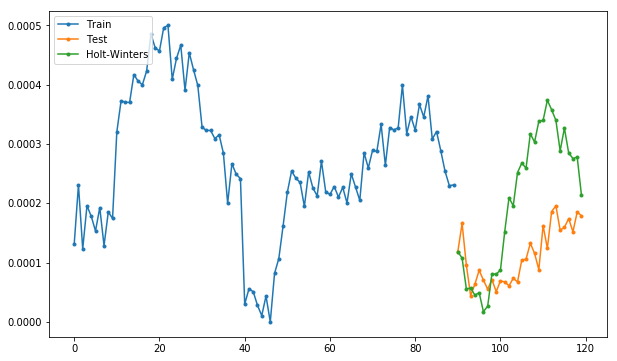

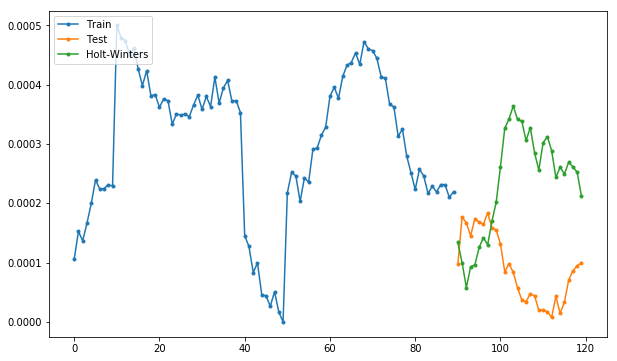

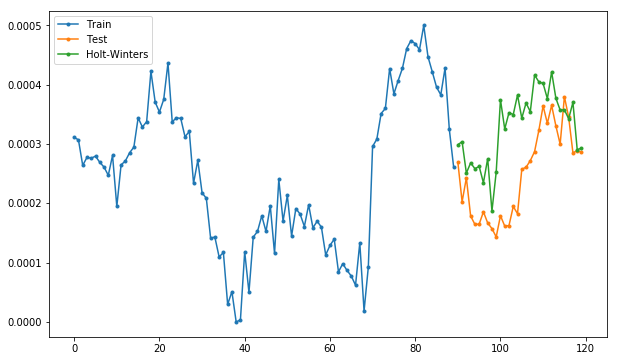

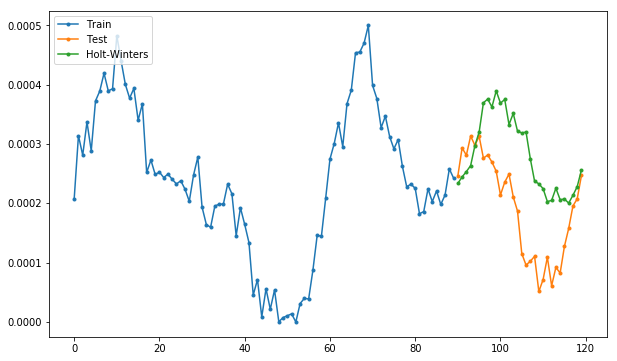

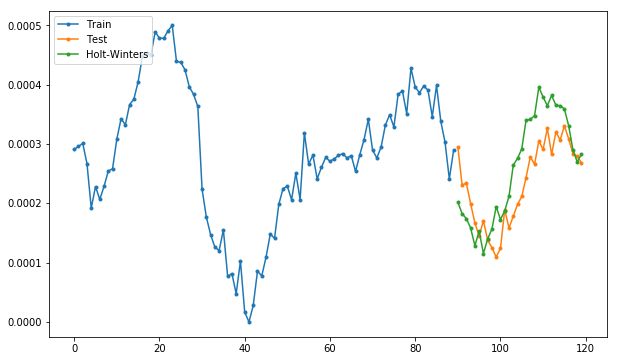

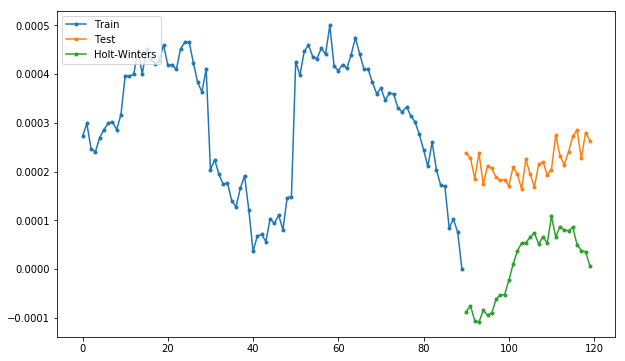

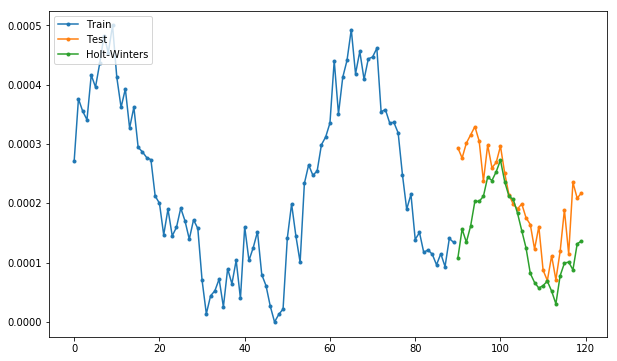

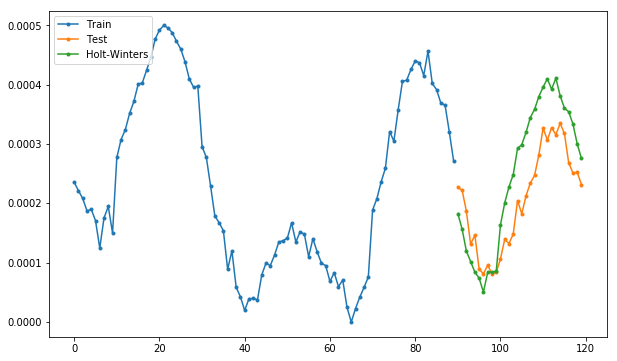

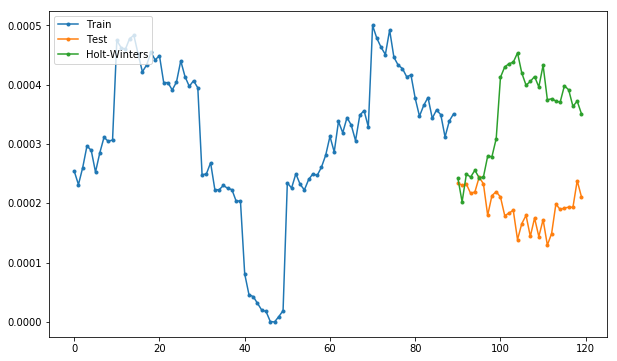

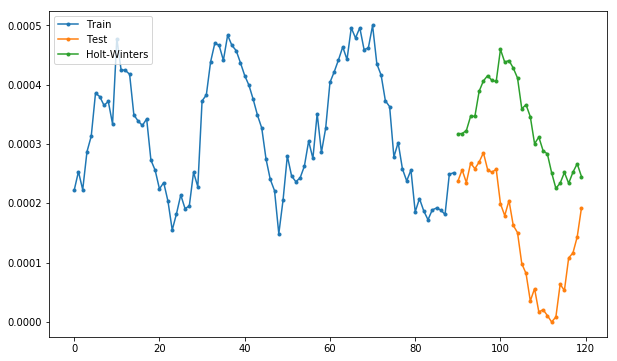

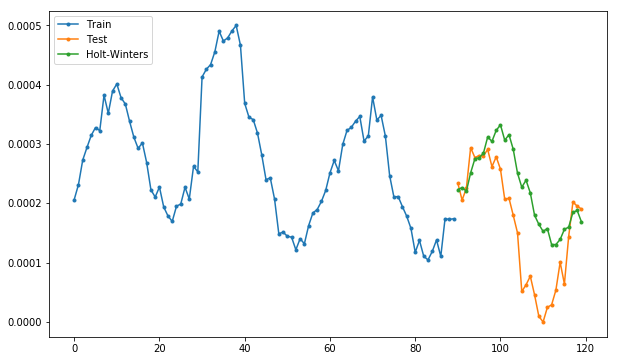

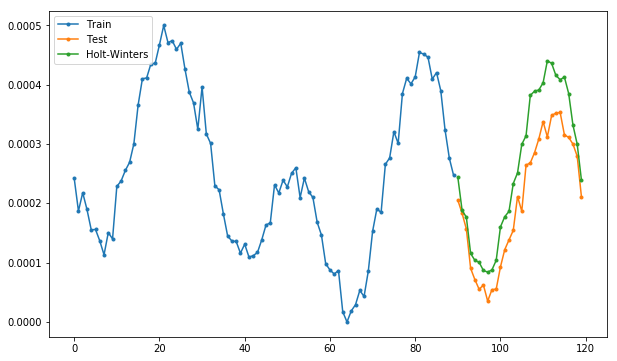

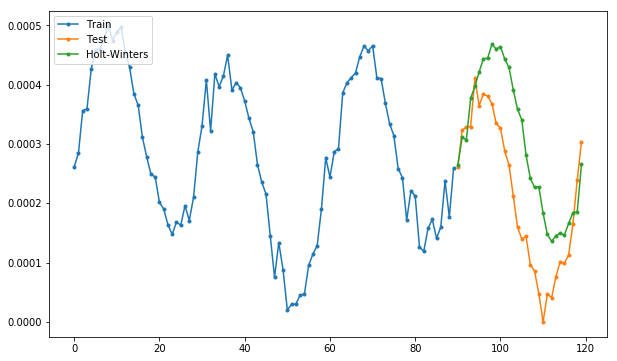

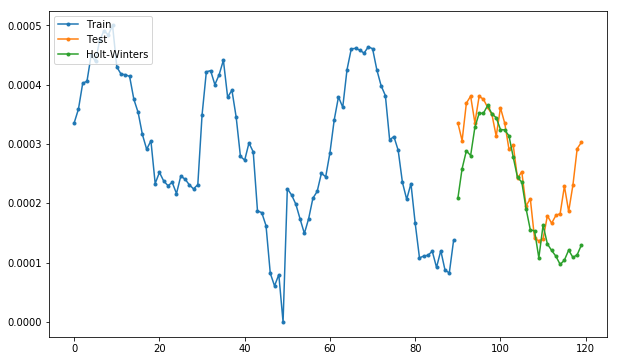

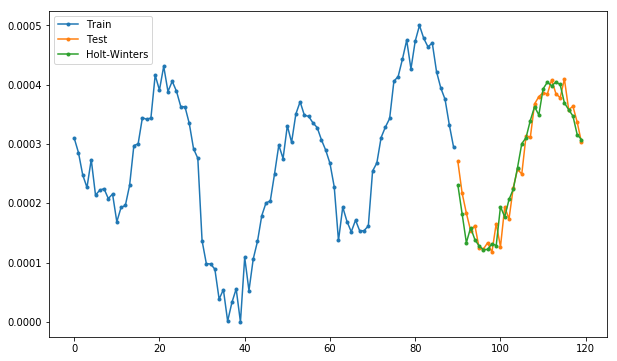

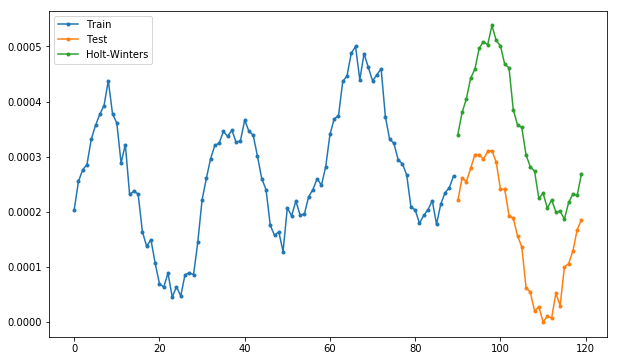

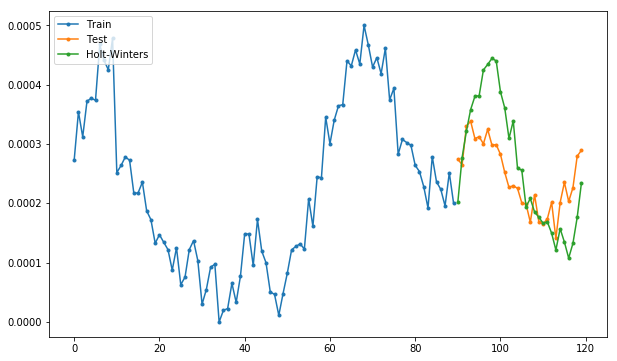

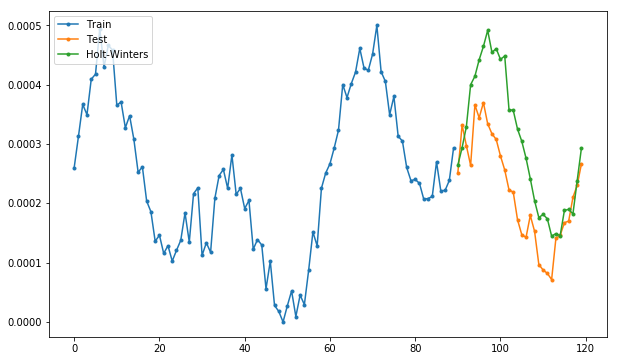

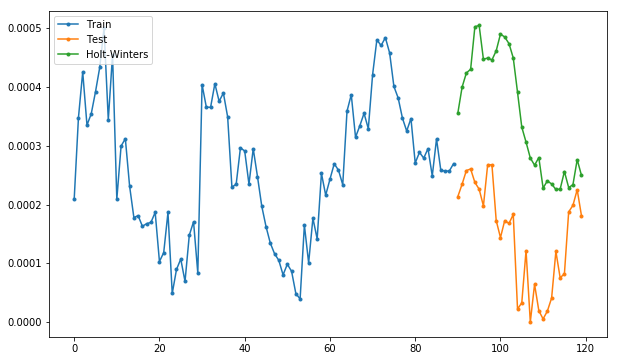

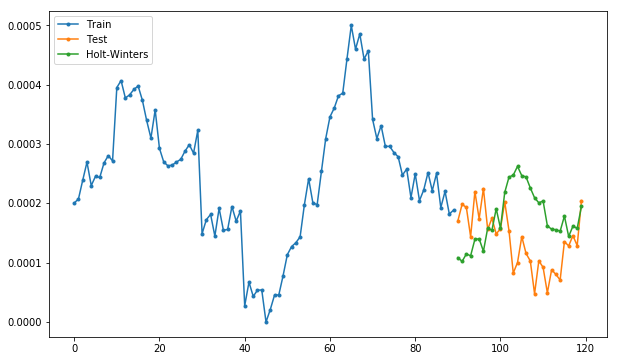

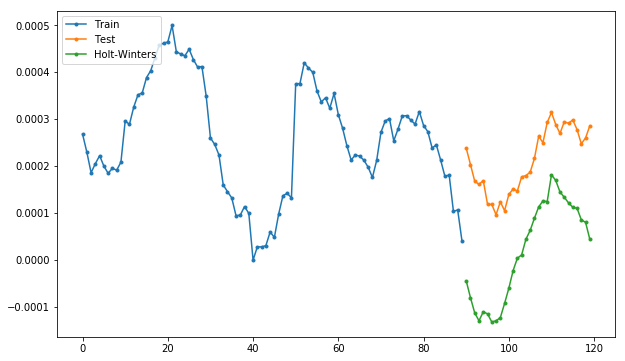

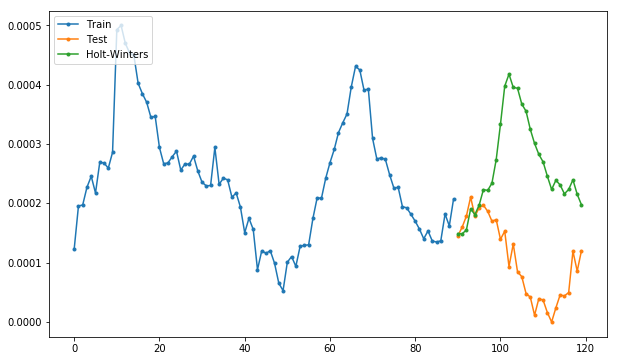

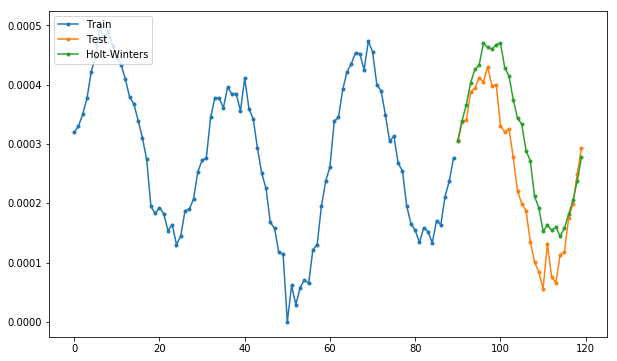

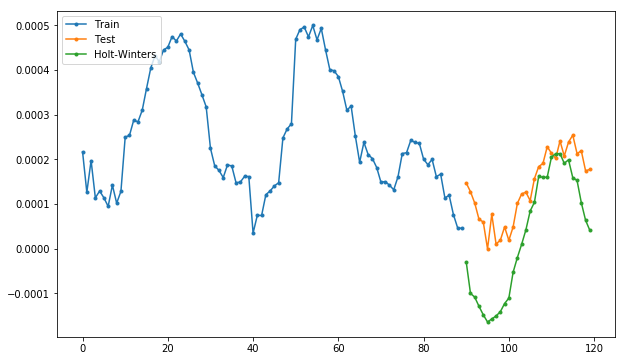

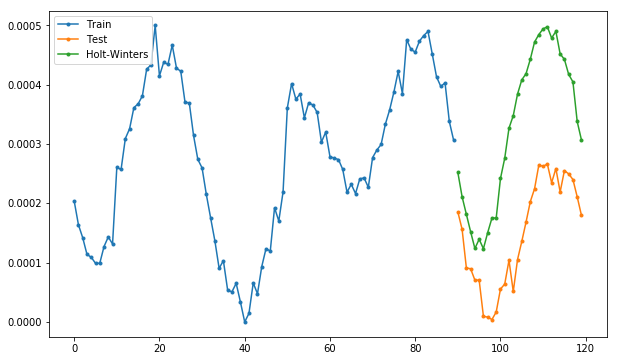

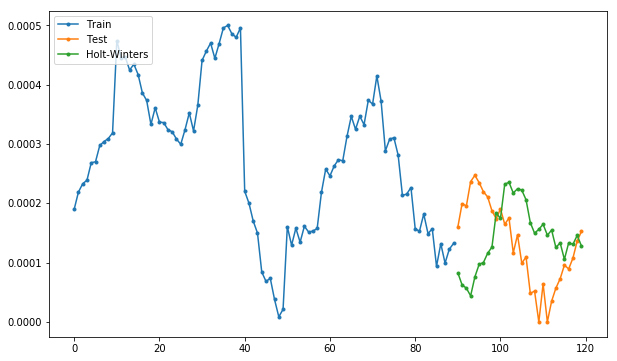

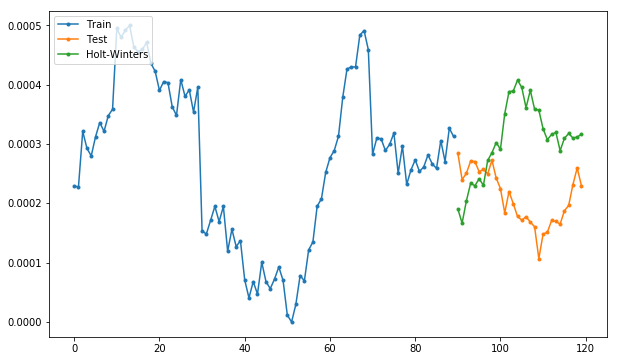

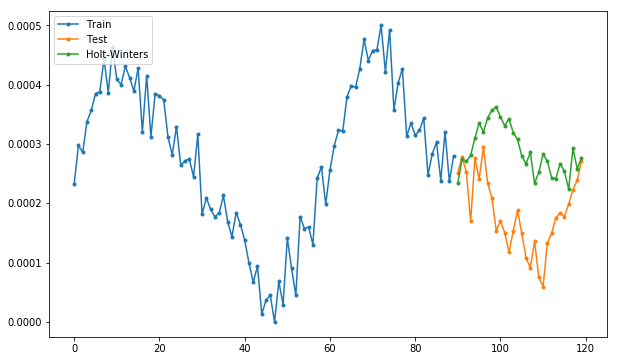

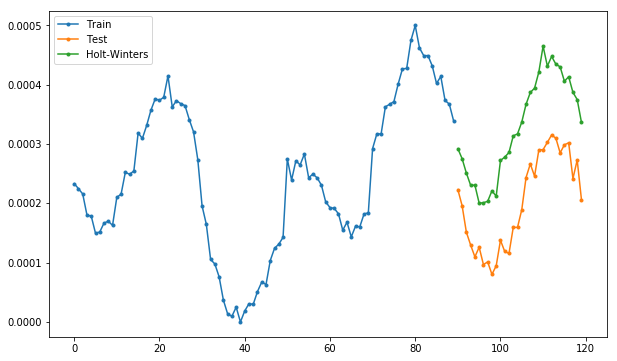

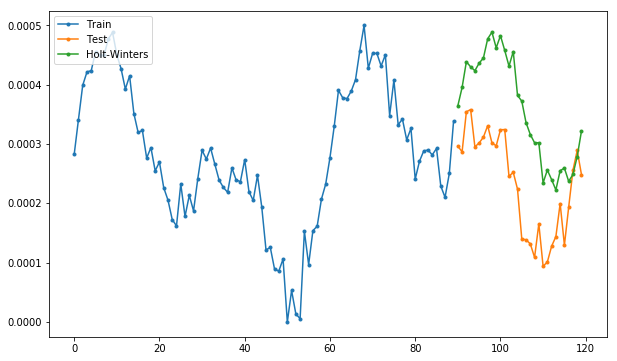

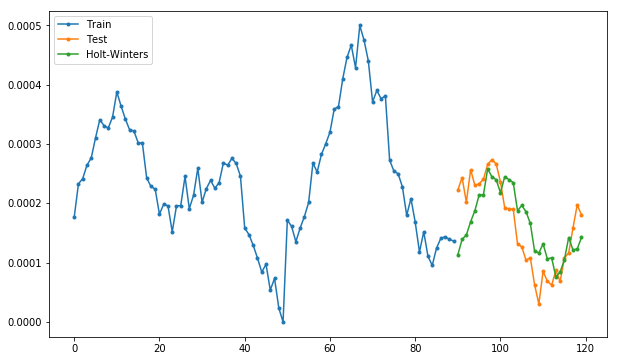

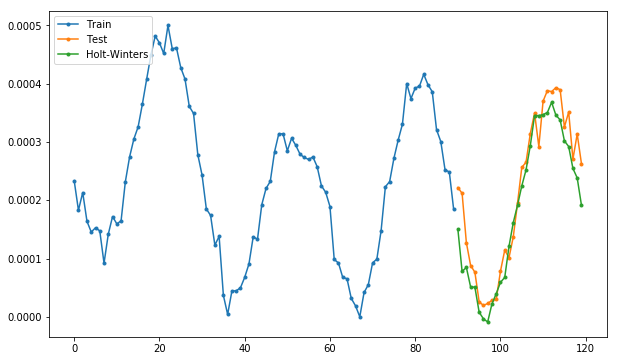

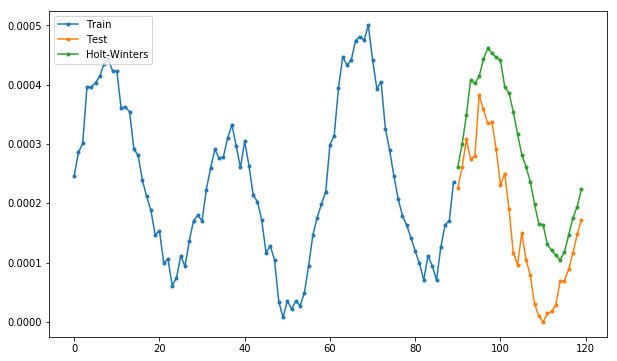

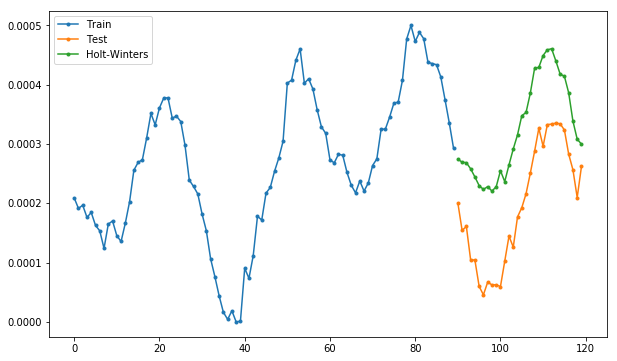

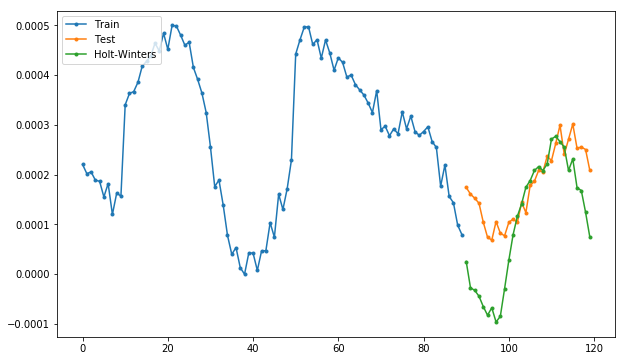

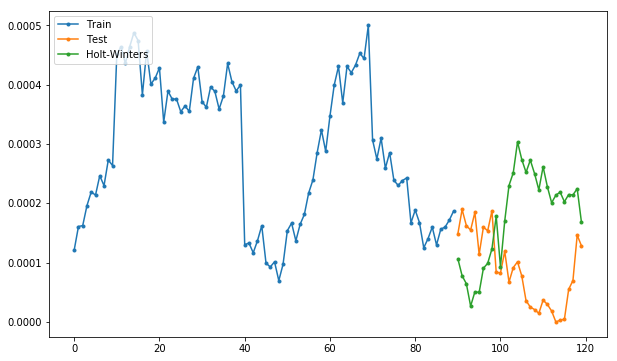

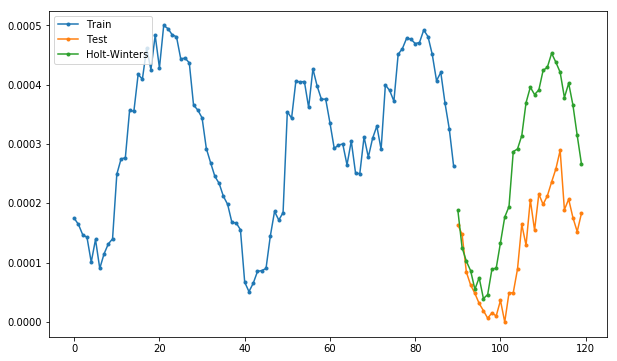

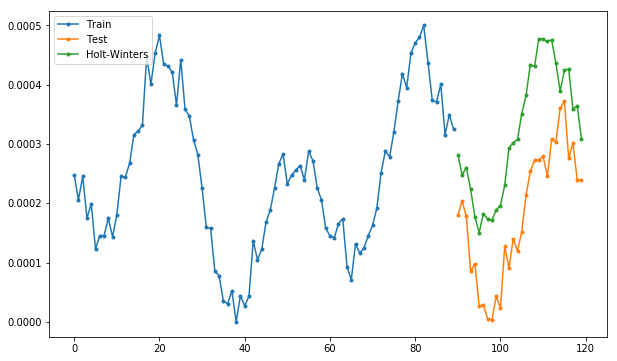

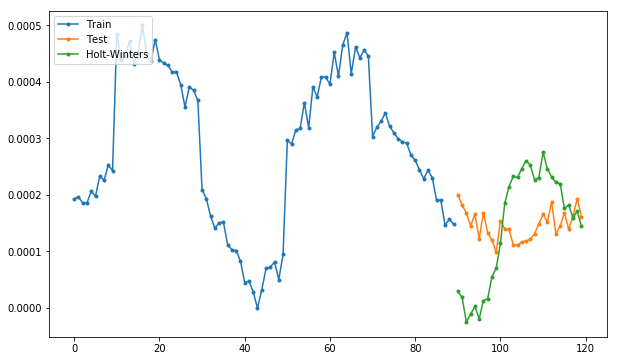

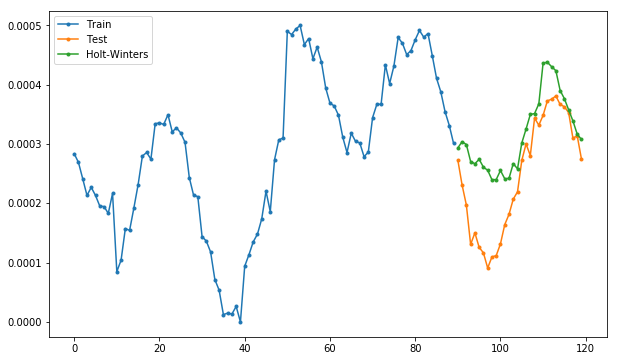

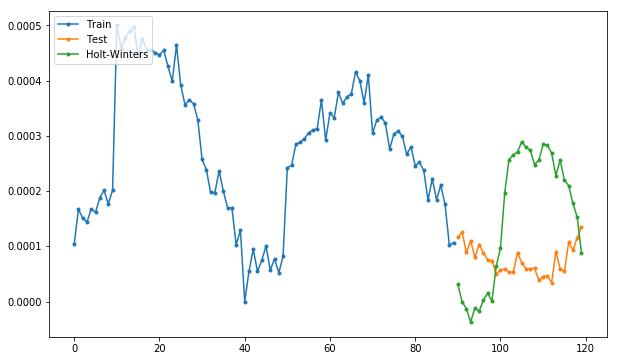

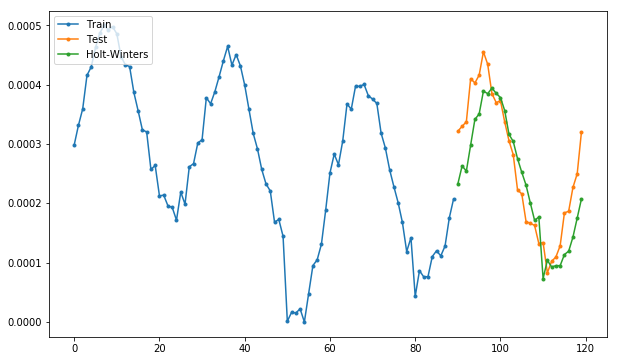

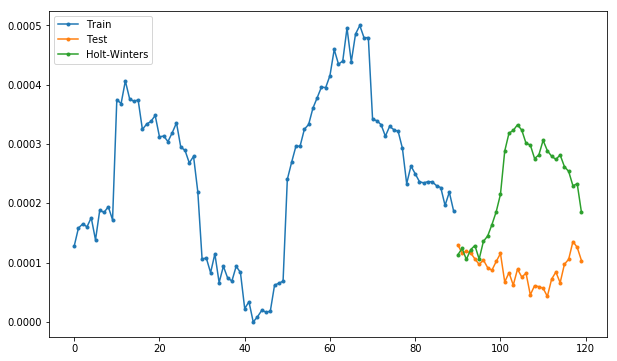

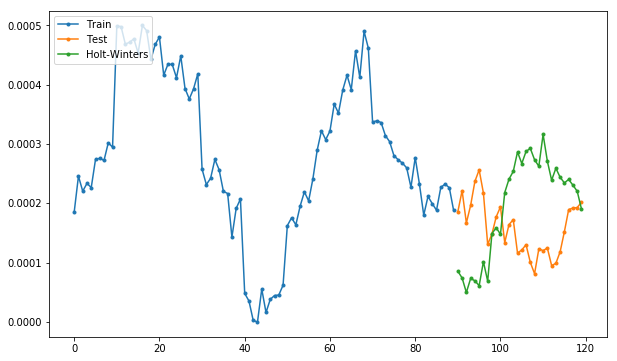

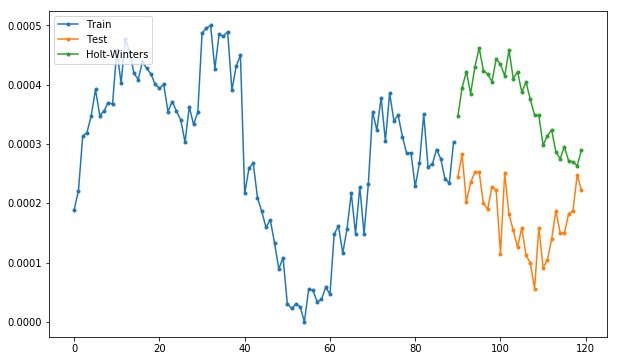

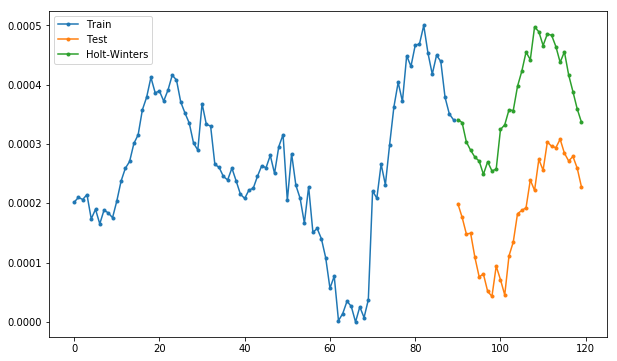

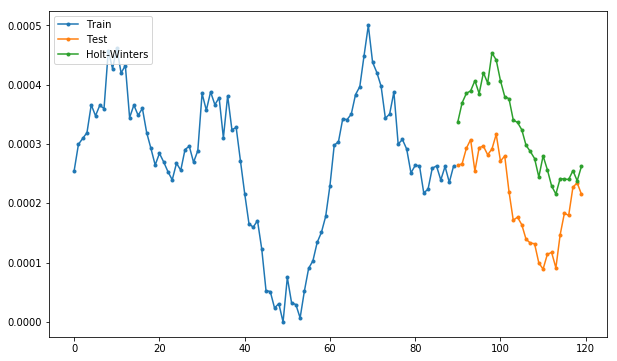

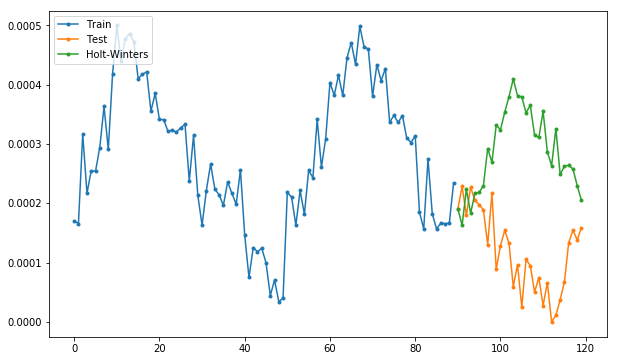

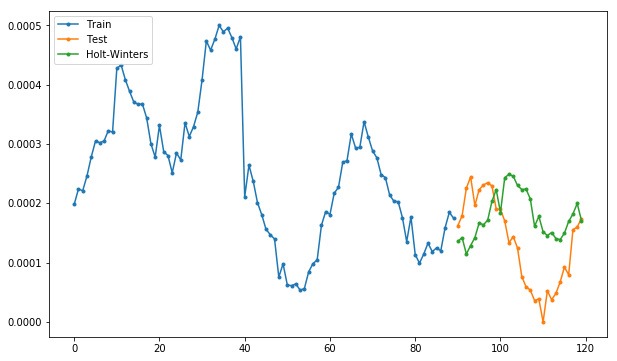

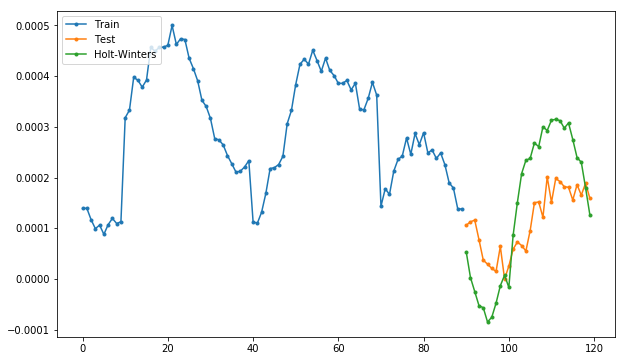

In [34]:
random_indexes = range(data.shape[1])
random.shuffle(random_indexes)

for i in random_indexes[:50]:
    train_size = 90
    train, test = data.iloc[:train_size, i], data.iloc[train_size:, i]

    model = ExponentialSmoothing(train,
                                 seasonal='add',
                                 trend=None,
                                 seasonal_periods=30).fit()
    pred = model.predict(start=test.index[0], end=test.index[-1])
    plt.figure()
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.plot(train.index, train, marker = '.', label='Train');
    plt.plot(test.index, test, marker='.', label='Test')
    plt.plot(pred.index, pred, marker='.', label='Holt-Winters')
#     plt.xlim([datetime.date(2017,1,1), datetime.date(2018,6,1)])
#     plt.ylim(20,)
    plt.legend(loc=2)

### Let's calculate the Upper Bound of the revenue

First - Naive calculation

In [148]:
naive_upper_bound = np.sum(np.max(data.values[60:, :], axis=0) - np.min(data.values[60:, :], axis=0))
print 'naive upper bound = {:.2f}'.format(naive_upper_bound)

naive upper bound = 3.91


The more realistic calculation:

(Considering, that minimum should appear before maximum)

In [147]:
real_upper_bound = np.sum(max_diff(data.values[60:, col]) for col in range(data.values.shape[1]))
print 'real upper bound = {:.2f}'.format(real_upper_bound)

real upper bound = 2.57


In [79]:
np.sum(trade[:, 1] - trade[:, 0])

0.106410487

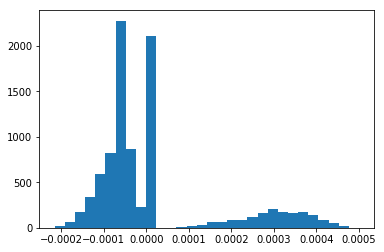

In [78]:
plt.hist(trade[:, 1] - trade[:, 0], bins=30);

In [131]:
!mv max_diff.png img/


<img src="img/max_diff.png",width=400,height=400>

In [149]:
def max_diff(arr):
    
    """returns max difference in list, such that
    mininmum appears before maximum"""
    
    max_diff = arr[1] - arr[0]
    min_element = arr[0]
    for val in arr:
        if val - min_element > max_diff:
            max_diff = val - min_element
        if val < min_element:
            min_element = val
    return max_diff

In [143]:
max_diff([9, 1, 2, 4, 10, -10, 2])

12